## Loading Libraries

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [2]:
from utils.DatasetHelper import *
from utils.ModelHelper import *
from utils.PlotHelper import *

## Dataset Paths

In [3]:
train_folder = '../../../../Data/merged/train'
test_folder = '../../../../Data/merged/validation'
X_train, y_train = load_images_from_folder_fer_2013(train_folder)
X_test, y_test = load_images_from_folder_fer_2013(test_folder)

In [ ]:
expw_path = '../../../../Data/ExpW-F'
target_path = '../../../../Data/ExpW-F-Preprocessed'
preprocess_expw_images(expw_path, target_path)

In [ ]:
source_folder = '../../../../Data/ExpW-F-Preprocessed'
train_folder = '../../../../Data/ExpW-F-Preprocessed/train'
validation_folder = '../../../../Data/ExpW-F-Preprocessed/validation'

split_data(source_folder, train_folder, validation_folder, test_size=0.2)

In [ ]:
dataset1_path = '../../../../Data/fer2013'
dataset2_path = '../../../../Data/ExpW-F-Preprocessed'
merged_dataset_path = '../../../../Data/merged'

merge_datasets(dataset1_path, dataset2_path, merged_dataset_path)

## Applying PCA using Sklearn PCA

In [ ]:
predictions = apply_sklearn_PCA(X_train, X_test, y_train)

In [ ]:
plot_label_accuracies(y_test, predictions, "Sklearn's PCA")

## Applying PCA using Manuel PCA

In [16]:
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
X_test_small, y_test_small = [], []
for classname in classes:
    X_test_small.append(X_test[y_test == classname][:200])
    y_test_small.append(y_test[y_test == classname][:200])

X_test_small = np.concatenate(X_test_small)
y_test_small = np.concatenate(y_test_small)

X_Test lenght:  1400
% 7.142857142857142
% 14.285714285714285
% 21.428571428571427
% 28.57142857142857
% 35.714285714285715
% 42.857142857142854
% 50.0
% 57.14285714285714
% 64.28571428571429
% 71.42857142857143
% 78.57142857142857
% 85.71428571428571
% 92.85714285714286
% 100.0


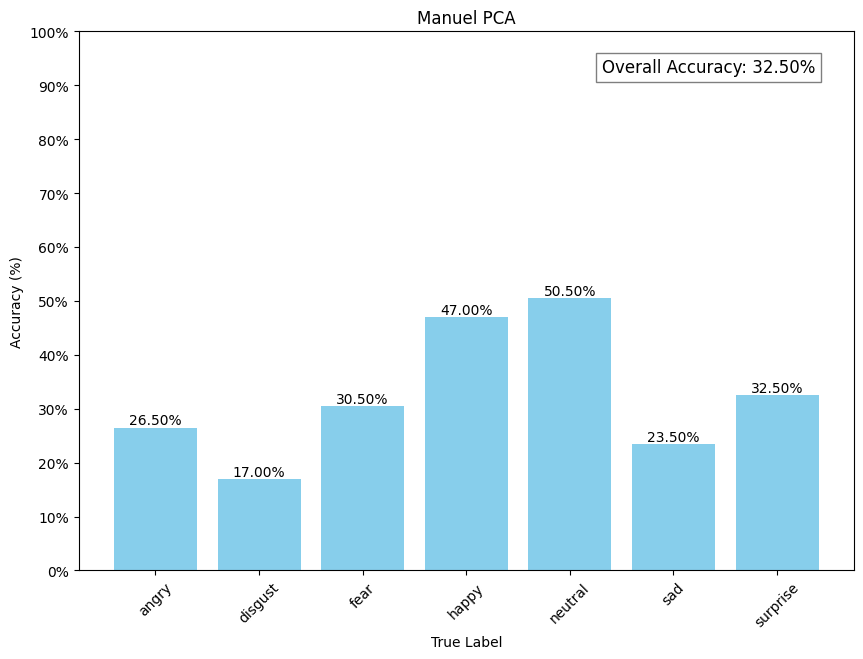

In [17]:

predictions_manuel = apply_manuel_PCA(X_train, X_test_small, y_train, variance_threshold=0.95)

plot_label_accuracies(y_test_small, predictions_manuel, "Manuel PCA")

In [ ]:
plot_label_accuracies(y_test, predictions_manuel, "Manuel PCA")

--------------------

## Best Parameters Finding

In [ ]:
from sklearn.svm import SVC

def manuel_PCA_best_variance(X_train, X_test, y_train, y_test, variance_list):
    accuracies = []
    for variance in tqdm(variance_list):
        print("Variance: ", variance)
        X_train_pca, X_test_pca = manuel_PCA(
            X_train, X_test, variance_threshold=variance)
        clf_svm_pca = SVC(C=1.0, kernel='rbf', gamma='scale', class_weight='balanced', random_state=0)
        clf_svm_pca.fit(X_train_pca, y_train)
        y_pred = clf_svm_pca.predict(X_test_pca)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append({variance, accuracy})
        print("Accuracy: ", accuracy)
    return accuracies


variance_list = [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
manuel_PCA_best_variance(X_train, X_test, y_train, y_test, variance_list)

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

def pca_with_parameters(X_train, y_train, X_test, y_test, params):
    param_grid = ParameterGrid(params)
    params_accuracy = []
    for param in tqdm(list(param_grid)):
        pca = PCA(n_components=param['n_components'],
                  svd_solver=param['svd_solver'],
                  iterated_power=param['iterated_power'],
                  random_state=param['random_state'])
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        clf_svm_pca = SVC(C=1.0, kernel='rbf', gamma='scale', class_weight='balanced', random_state=0)
        clf_svm_pca.fit(X_train_pca, y_train)
        y_pred = clf_svm_pca.predict(X_test_pca)


        plot_label_accuracies(y_test, y_pred,f"n_components: {param['n_components']}, svd_solver: {param['svd_solver']}, iterated_power: {param['iterated_power']}")

        accuracy = accuracy_score(y_test, y_pred)
            
        print(f"Params: {param} -- Accuracy: {accuracy}")
        params_accuracy.append((param, accuracy))

    return params_accuracy

In [ ]:
params = {
    'n_components': [20, 40, 60, 100, 150],
    'svd_solver': ['auto'],
    'iterated_power': ['auto', 3, 7],
    'random_state': [42]
}
pca_with_parameters(X_train, y_train, X_test, y_test, params)

In [ ]:
train_folder = '../../../../Data/fer2013/train'
test_folder = '../../../../Data/fer2013/validation'
X_train, y_train = load_images_from_folder_fer_2013(train_folder)
X_test, y_test = load_images_from_folder_fer_2013(test_folder)


------------------------------------------------------------------------------------------------------------

In [ ]:
import joblib

def export_pca(pca, filename):
    joblib.dump(pca, filename)
    print(f"PCA modeli '{filename}' olarak kaydedildi.")
def export_classifier(classifier, filename):
    joblib.dump(classifier, filename)
    print(f"Model '{filename}' olarak kaydedildi.")